In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
n = 10

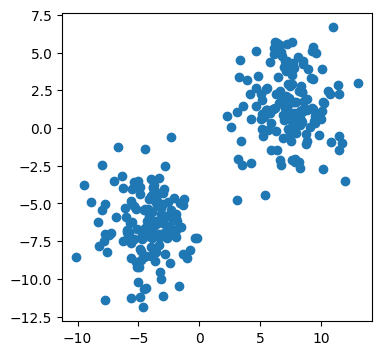

In [682]:
dataset = datasets.make_blobs(n_samples=300, n_features=2, centers=2, random_state=25, shuffle=True, cluster_std=2)
X, y = dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

fig, ax = plt.subplots(figsize=(4, 4))
#ax[0].scatter(X[:, 0], y)
#ax[1].scatter(X[:, 1], y)
ax.scatter(X[:, 0], X[:, 1])
plt.show()

Accuracy: 100.0%


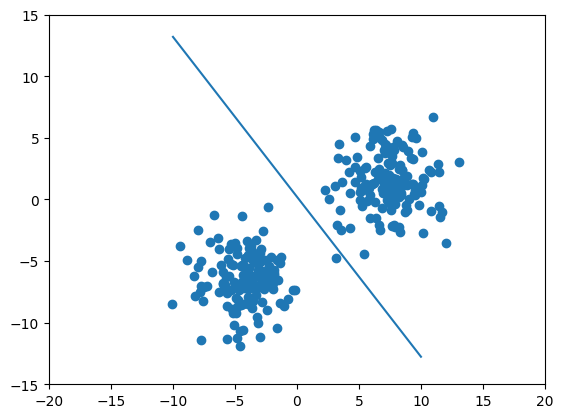

In [683]:
class Perceptron(object):
    def __init__(self):
        pass
    
    def activation_function(self, preds):
        return np.where(preds>=0,1,0)
    
    def fit(self, X, y, epochs, nrn=25, lr=0.1):
        n, m = X.shape
        bias = 0
        weights = np.random.uniform(0, 1, m)
        n_weights = np.random.uniform(0, 1,(nrn, m))
        neurons = np.ones(nrn)
        for e in range(epochs):
            for i in range(len(X)):
                for j in range(nrn):
                    h = np.dot(X[i], n_weights[j]) + bias 
                    neurons[j] = self.activation_function(h)
                    error = (y[i] - neurons[j])
                    update =  lr * error
                    n_weights[j] = n_weights[j] + update * X[i]
                    bias = bias + update
                    
        for w in n_weights:
            weights = weights + w
        weights = weights / len(n_weights)
        return weights, np.round(np.sum(neurons)/len(neurons)), bias
    
    def predict(self, X, weights, bias):
        self.y_preds = self.activation_function(np.dot(X, weights)+bias)
        
    def accuracy(self, y_test):
        return (np.sum(self.y_preds == y_test)/len(self.y_preds))*100
           
    def get_boundary(self, bias, weights, x):
        m = - weights[0] / weights[1]
        b = - bias / weights[1]
        return m * x + b 
        
model = Perceptron()
weights, y_pred, bias = model.fit(X_train, y_train, epochs=100, nrn=5, lr=0.1)
model.predict(X_test, weights, bias)
accuracy = model.accuracy(y_test)
print("Accuracy: {0}%".format(accuracy))

fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1])

x = np.linspace(-10, 10, 1000)
y = np.array([model.get_boundary(bias, weights, i) for i in x])
plt.xlim([-20, 20])
plt.ylim([-15, 15])
plt.plot(x, y)
plt.show()